In [1]:
from langgraph.graph import StateGraph, START, END
# from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import InMemorySaver
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
# from langchain_core.messages import BaseMessage, HumanMessage
from typing import TypedDict
from dotenv import load_dotenv
# import operator
import os

load_dotenv()

True

In [ ]:
llm = HuggingFaceEndpoint(
    repo_id="openai/gpt-oss-20b",
    task="task-generation",
    huggingfacehub_api_token=os.getenv("HUGGINGFACEHUB_API_TOKEN")
)

llm = ChatHuggingFace(llm=llm)


In [3]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanantion: str

In [4]:
def generate_joke(state: JokeState):
    prompt = f"Generate a funny joke on the topic {state['topic']}"
    response = llm.invoke(prompt)

    return {'joke': response}

In [5]:
def generate_explanation(state: JokeState):
    prompt =f"Write am explanation for the joke: {state['joke']}"
    response = llm.invoke(prompt)

    return {'explanation': response}

In [6]:
graph = StateGraph(JokeState)

# add nodes
graph.add_node(generate_joke, generate_joke)
graph.add_node('generate_explanation', generate_explanation)

# add edges
graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', "generate_explanation")
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

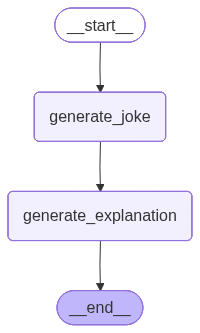

In [7]:
workflow

In [11]:
config = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic': 'Chatgpt'}, config=config)

{'topic': 'Chatgpt',
 'joke': AIMessage(content='Why did the human ask ChatGPT for a recipe for a good laugh?\n\nBecause we heard the AI’s “punchlines” are so algorithmic they’ll make your brain variables explode—and even if it can’t cook, it sure can sprinkle a joke with perfect syntax!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 177, 'prompt_tokens': 81, 'total_tokens': 258}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--667a7cca-a31b-4fbe-8629-199dfbe900eb-0', usage_metadata={'input_tokens': 81, 'output_tokens': 177, 'total_tokens': 258})}

In [ ]:
workflow.get_state(config)  # final state value

StateSnapshot(values={'topic': 'Chatgpt', 'joke': AIMessage(content='Why did the human ask ChatGPT for a recipe for a good laugh?\n\nBecause we heard the AI’s “punchlines” are so algorithmic they’ll make your brain variables explode—and even if it can’t cook, it sure can sprinkle a joke with perfect syntax!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 177, 'prompt_tokens': 81, 'total_tokens': 258}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--667a7cca-a31b-4fbe-8629-199dfbe900eb-0', usage_metadata={'input_tokens': 81, 'output_tokens': 177, 'total_tokens': 258})}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f097d27-9e0d-6b1e-8004-1f58d8565481'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2025-09-22T16:37:49.219026+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '

In [ ]:
workflow.get_state_history(config)  # Intermediate state value

In [ ]:
state_history = workflow.get_state_history(config)
for i, state in enumerate(state_history):
    print(f"Step {i} state: {state}")

Step 0 state: StateSnapshot(values={'topic': 'Chatgpt', 'joke': AIMessage(content='Why did the human ask ChatGPT for a recipe for a good laugh?\n\nBecause we heard the AI’s “punchlines” are so algorithmic they’ll make your brain variables explode—and even if it can’t cook, it sure can sprinkle a joke with perfect syntax!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 177, 'prompt_tokens': 81, 'total_tokens': 258}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--667a7cca-a31b-4fbe-8629-199dfbe900eb-0', usage_metadata={'input_tokens': 81, 'output_tokens': 177, 'total_tokens': 258})}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f097d27-9e0d-6b1e-8004-1f58d8565481'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2025-09-22T16:37:49.219026+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'che

In [21]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic': 'Google DeepMind'}, config=config2)

{'topic': 'Google DeepMind',
 'joke': AIMessage(content='Why did the Google DeepMind model go to therapy?  \n\nBecause it kept having “off‑policy” thoughts about its own *self‑improving* future!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 170, 'prompt_tokens': 81, 'total_tokens': 251}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--9bc331e2-ea62-4d8e-8efb-1f19b3b7689f-0', usage_metadata={'input_tokens': 81, 'output_tokens': 170, 'total_tokens': 251})}

In [25]:
workflow.get_state(config2)  # final state value

StateSnapshot(values={'topic': 'Google DeepMind', 'joke': AIMessage(content='Why did the Google DeepMind model go to therapy?  \n\nBecause it kept having “off‑policy” thoughts about its own *self‑improving* future!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 170, 'prompt_tokens': 81, 'total_tokens': 251}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--9bc331e2-ea62-4d8e-8efb-1f19b3b7689f-0', usage_metadata={'input_tokens': 81, 'output_tokens': 170, 'total_tokens': 251})}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f097d3a-45eb-6867-8002-d816ebc358ec'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-22T16:46:10.004936+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f097d3a-0fb5-6cf6-8001-5970ddcf4659'}}, tasks=(), interrupts=())

In [24]:
state_history = workflow.get_state_history(config2)
for i, state in enumerate(state_history):
    print(f"Step {i} state: {state}")

Step 0 state: StateSnapshot(values={'topic': 'Google DeepMind', 'joke': AIMessage(content='Why did the Google DeepMind model go to therapy?  \n\nBecause it kept having “off‑policy” thoughts about its own *self‑improving* future!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 170, 'prompt_tokens': 81, 'total_tokens': 251}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--9bc331e2-ea62-4d8e-8efb-1f19b3b7689f-0', usage_metadata={'input_tokens': 81, 'output_tokens': 170, 'total_tokens': 251})}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f097d3a-45eb-6867-8002-d816ebc358ec'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-22T16:46:10.004936+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f097d3a-0fb5-6cf6-8001-5970ddcf4659'}}, tasks=(), interrupts=())
Step 1 state: 